# Practical 3: Deep Feed-forward Networks
**IndabaX Sudan 2022**

# Introduction
## Deep Learning

Deep Learning is a subfield of machine learning concerned with algorithms that use the idea of neural networks.

Deep Learning models are best suited for unstructured data like images, video, sound, or text while Machine Learning models (specifically tree-based algorithms) are best applied to tabular and time-series data.

This session will give an introduction to Tensorflow and Keras (Frameworks used for deep learning) then show how to build a neural network model for a multiclassification task.

## Learning objectives
* Understand the basics of Tensorflow
* Understand how a deep learning model is built and trained
* Understand the concept of **train/validation/test split** and why it's useful
* Understand how to evaluate your model properly
* Research at least 1 techniques that can be used to improve model **generalisation**

#Tensorflow
TensorFlow is a Python-based, free, open source machine learning platform, developed
primarily by Google. Much like NumPy, the primary purpose of TensorFlow is to
enable engineers and researchers to manipulate mathematical expressions over
numerical tensors. But TensorFlow goes far beyond the scope of NumPy in the following
ways:
* It can automatically compute the gradient of any differentiable expression, making it highly suitable for machine learning.
* It can run not only on CPUs, but also on GPUs and TPUs, highly parallel hardware
accelerators.
* Computation defined in TensorFlow can be easily distributed across many
machines.
* TensorFlow programs can be exported to other runtimes, such as C++, Java-
Script (for browser-based applications), or TensorFlow Lite (for applications
running on mobile devices or embedded devices), etc. This makes TensorFlow
applications easy to deploy in practical settings.

## Keras
Keras is a deep learning API for Python, built on top of TensorFlow, that provides a convenient way to define and train any kind of deep learning model.

#Basics of Tensors
Tensors is a generalisation of matrices to higher dimensions, or roughly equivalent to multi-dimensional arrays. 
* Scalar is a 0-dimensional tensors
* Vector is a 1-dimensional tensor
* Standard matrix is a 2-dimensional tensor
* A cube of matrices is a 3-dimensional tensor
* Higher-dimensional tensors have 3 or more dimensions.

**Note**: Don't be confused when people say "2-D vector" or "3-D vector", which refers to a 1-dimensional tensor that has size 2 or 3.

## Data Representations for Neural Networks
* **Tabular Data:** Rank-2 tensors of shape (samples, features), where each sample is a vector of numerical attributes (“features”)
* **Timeseries data or sequence data:** Rank-3 tensors of shape (samples, timesteps, features), where each sample is a sequence (of length timesteps) of feature vectors
* **Images:** Rank-4 tensors of shape (samples, height, width, channels), where each sample is a 2D grid of pixels, and each pixel is represented by a vector of values (“channels”)
* **Video:** Rank-5 tensors of shape (samples, frames, height, width, channels), where each sample is a sequence (of length frames) of images

# Manipulating Tensors with Tensorflow

In [2]:
#@title Import Libraries { display-mode: "form" }
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Constants

For statrers, we can define a constant which is a tensor whose value cannot be changed at all. It can take many shapes and dimentions as the examples below show.

In [3]:
#for declaring constants we use the ft.constant function
x1 = tf.constant(3)            #shape ()   Rank-0 tensor
print(f"x1: \n{x1}\n")

x2 = tf.constant([3, 5, 7])    #shape (3,) Rank-1 tensor
print(f"x2: \n{x2}\n")

x3 = tf.constant([[1, 0, 3],
                  [9, 3, 6],
                  [8, 1, 7]])    #shape (3,3) Rank-2 tensor
print(f"x3: \n{x3}\n")

x1: 
3

x2: 
[3 5 7]

x3: 
[[1 0 3]
 [9 3 6]
 [8 1 7]]



In [4]:
#We can use tf.stack to concatenate tensors to each other
x4 = tf.stack([x2, x2])        #shape (2, 3)
print(f"x4: \n{x4}")

x4: 
[[3 5 7]
 [3 5 7]]


### Variables

Variables are tensors whose value can be changed.

In [5]:
x1 = tf.Variable([3, 5, 7])    #shape (3,) Rank-1 tensor
print(f"x1: \n{x1}")

# Change the value via the tf.assign function
x1.assign([1,9,10])
print(f"x1: \n{x1}\n")

x1: 
<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([3, 5, 7], dtype=int32)>
x1: 
<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([ 1,  9, 10], dtype=int32)>



### Basic TensorFlow operations
#### Addition and Subtraction

In [6]:
a1 = tf.constant([1, 2, 3])
a2 = tf.constant([3, 4, 5])
a3 = a1 + a2 # (tf.add(a1, a2) also works. TensorFlow supports primitive operators)
print(a3)
# Result [4, 6, 8]

a4 = a1 - a2
print(a4)
# Result [-2, -2, -2]

tf.Tensor([4 6 8], shape=(3,), dtype=int32)
tf.Tensor([-2 -2 -2], shape=(3,), dtype=int32)


#### Multiplication and Division

In [7]:
a1 = tf.constant([1, 2, 3])
a2 = tf.constant([3, 4, 5])
a3 = a1 * a2 # (tf.mul(a1, a2) also works. TensorFlow supports primitive operators)
print(a3)
# Result [3, 8, 15]

a4 = a1/a2
print(a4)
# Result [0.33333333, 0.5, 0.6]

tf.Tensor([ 3  8 15], shape=(3,), dtype=int32)
tf.Tensor([0.33333333 0.5        0.6       ], shape=(3,), dtype=float64)


#### Reshape

In [8]:
a1 = tf.constant(([3, 5, 7],
                  [4, 6, 8]))  # Shape is (2, 3)

a2 = tf.reshape(a1, [3, 2])
print(a2)
# Result: [[3, 5]
#          [7, 4]
#          [6, 8]]
# Shape is (3,2)

tf.Tensor(
[[3 5]
 [7 4]
 [6 8]], shape=(3, 2), dtype=int32)


Now that we got the basics of tensorflow we can delve into the meat of the practical and start on the Feed-forward Network
# The Data
* In this practical, we use the MNIST dataset consisting of 70,000 greyscale images and their labels. The dataset is divided into 60,000 training images and 10,000 test images. 
* The idea is to train a **classifier** to identify the class value (what type of number it is) given the image. We train and *tune* a model on the 60,000 training images and then evaluate how well it classifies the 10,000 test images that the model did not see during training. 
* This task is an example of a **supervised learning** problem, where we are given both input and labels (targets) to learn from. This is in contrast to **unsupervised learning** where we only have inputs from which to learn patterns or **reinforcement learning** where an agent learns how to maximise a reward signal through interaction with its environment. 

In [9]:
# Tensorflow has convenient modules for loading a number of standard datasets
mnist = tf.keras.datasets.mnist
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


### Optional extra reading: Train/Validation/Test Split

When we build machine learning models, the goal is to build a model that will perform well on *future* data that we have not seen yet. We say that we want our models to be able to **generalise** well from whatever training data we can collect and do have available, to whatever data we will be applying them to in future. To do this, we split whatever data we have available into a **training set, a validation set and a test set**. The idea is that we train our model and use the performance on the validation set to make any adjustments to the model and its hyperparameters, but then we report the final accuracy on the test set. The test set (which we never train on), therefore acts as a proxy for our future data.

### Construct a validation set
Next, we remove 10,000 images and labels from the training set to use as a validation set. We will come back to the validation set later! 

In [10]:
# Construct a validation set from the last 10000 images and labels from

# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:]

# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]

### Exploratory Data Analysis (EDA)
* Each image in the dataset consists of a 28 x 28 matrix of greyscale pixels. The values are between 0 and 255 where 0 represents black, 255 represents white and there are many shades of grey in-between. 
* Each image is assigned a corresponding numerical label, so the image in ```train_images[i]``` has its corresponding label stored in ```train_labels[i]```.

The 2 cells below demonstrate how to visualise the input data.

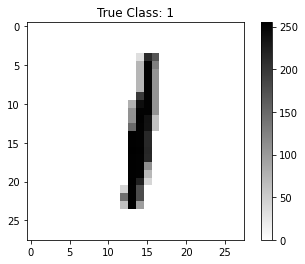

In [11]:
# We use the Matplotlib plotting library to visualise an image selected at random from the training set
plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray_r')
plt.colorbar()
numerical_label = train_labels[random_index]
plt.title('True Class: {}'.format(numerical_label))

plt.gca().grid(False)

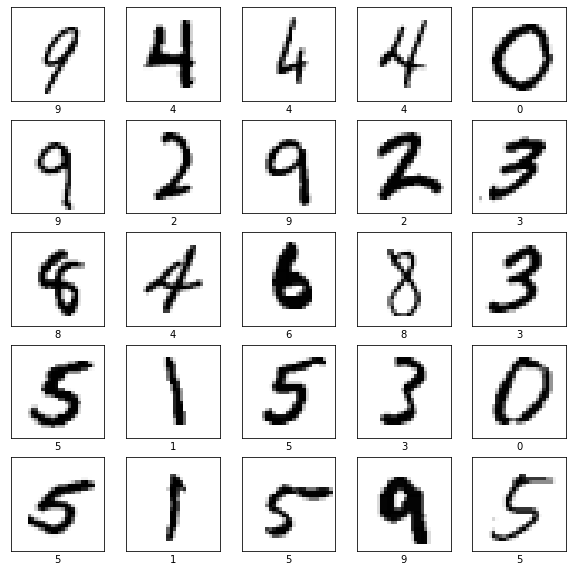

In [12]:
# Another view, showing 25 randomly selected images at a time
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap="gray_r")
    plt.xlabel(train_labels[img_index])

Lets use t-SNE to have some intuition about the hard-to-classify classes.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


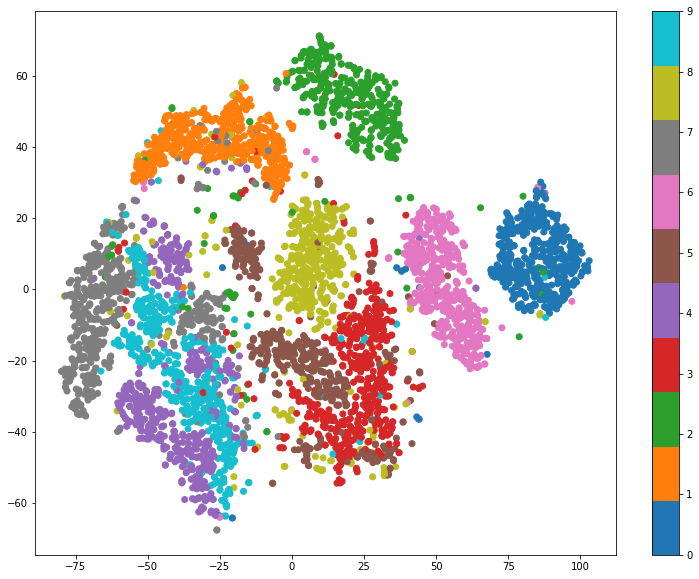

In [13]:
from sklearn.manifold import TSNE
idx = np.random.permutation(50000)[:5000]
train_df = train_images.reshape(50000,28*28)[idx,:]
target = train_labels[idx]

tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(train_df)

plt.figure(figsize=(13,10))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=target,cmap='tab10')
plt.colorbar()
plt.show()

We can see that most of the classes are somehow classifible easily except the 4s and 9s.

## Preparing the data with TensorFlow
* At the moment, our training data consists of two large tensors. The images are stored in a tensor of shape $[50000, 28, 28]$, consisting of all the $28 \times 28$ images matrices stacked together. The labels are stored in a 1D vector of shape $[50000]$. 
* We will reshape the data into the shape $(50000,784)$ to make it as $(samples,features)$.
* The data should be normalized before feeding it into the model.

In [14]:
train_images = train_images.reshape((50000, 28 * 28))
validation_images = validation_images.reshape((10000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype("float32") / 255
validation_images = validation_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

## Define the model
In this section we'll build a classifier. A **classifier** is a function that takes an object's characteristics (or "features") as inputs and outputs a prediction of the class (or group) that the object belongs to. It may make a single prediction for each input or it may output some score (for example a probability) for each of the possible classes. 

Specifically, we will build a classifier that takes in (a batch of) 28 x 28 MNIST images as we've seen above, and outputs predictions about which class the image belongs to. 

For each (batch of) input images, we will use a **feed-forward neural network** to compute probability scores for each of the 10 possible classes that the image could belong to. 

We can then **classify** the image as belonging to the class which receives the highest score.

A feed-forward neural network consisting of $N$ layers, applied to an input vector $\mathbf{x}$ can be defined as:

\begin{equation}
\mathbf{f_0} = \mathbf{x} \\
\mathbf{f_i} = \sigma_i(\mathbf{W_if_{i-1}} + \mathbf{b_i}) \ \ \ i \in [1, N]
\end{equation}

Each layer has a particular number, $m_i$, of neurons. The parameters of a layer consist of a matrix $\mathbf{W_i} \in \mathbb{R}^{m_i \times m_{i-1}}$ and bias vector $\mathbf{b_i} \in \mathbb{R}^{m_i}$. Each layer also has a non-linear activation function $\sigma_i$. 



### Activation functions



Activation functions are a core ingredient in deep neural networks. In fact, building a neural network without any activation functions would only result in a **linear model** no matter how deep is the network. Activation functions add the **non-linearity** to the model.
 
There are a number of different activation functions, each of which are more or less useful under different circumstances. The four activation functions that you are most likely to encounter are, arguably, [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU), [Tanh](https://www.tensorflow.org/api_docs/python/tf/keras/activations/tanh), [Sigmoid](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid), and [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Softmax). 

ReLU, has in recent years, become the default choice for use in MLPs and Convolutional Neural Networks (CNNs). ReLU has two advantages over Tanh and Sigmoid: it is computationally much more efficient, and, it allows us to use deeper networks because it does not suffer from [vanishing gradients](https://en.wikipedia.org/wiki/Vanishing_gradient_problem). As a result of their success, a number of ReLU variants, such as [LeakyRelu](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LeakyReLU) and [PReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/PReLU), have been developed.

Sigmoid and Softmax activations are often found after the last layer in binary and multi-class classification networks, respectively, as they transform the outputs of the network in such a way that we can interpret them as class probabilities.

Both Tanh and Sigmoid are found in LSTM and GRU recurrent neural networks. They are also useful in MLPs and CNNs where we want the output to be bounded between -1 and 1 (Tanh) or 0 and 1 (Sigmoid).

Read more about activation functions [here](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6). 

### Configure the feed-forward neural network
We configure the feed-forward neural network part of our classifier using the [Keras Layers API](https://www.tensorflow.org/api_docs/python/tf/keras/layers). This API consists of various reusable building-blocks that allow us to define many different neural network architectures (similar to how we defined a data pipeline earlier!). 

Here we use the [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) component which allows us to wrap together a sequence of layers. An important point to note here is that we are **configuring** our neural network architecture as a pipeline. We can think of the resulting ```model``` variable as a *function* that takes a batch of images as inputs and outputs a batch of probabilities. 

In [116]:
# RE-RUN THIS CELL if you want to restart training!
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    # Create a "hidden" layer with 256 neurons and apply the ReLU non-linearity
    tf.keras.layers.Dense(256, activation=tf.nn.relu, name='input_to_hidden1'),
    # Create another hidden layer with 64 neurons
    tf.keras.layers.Dense(64, activation=tf.nn.relu, name='hidden1_to_hidden2'),
    # Create an "output layer" with 10 neurons and apply the Softmax to convert the results into probabilities
    tf.keras.layers.Dense(10, activation=tf.nn.softmax, name='hidden_to_logits'),
])

The following summary shows how many parameters each layer is made up of (the number of entries in the weight matrics and bias vectors). Note that a value of ```None``` in a particular dimension of a shape means that the shape will dynamically adapt based on the shape of the inputs. In particular, the batch of inputs passed to the model has shape $[N, 784]$

In [82]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_to_hidden1 (Dense)    (None, 256)               200960    
                                                                 
 hidden1_to_hidden2 (Dense)  (None, 64)                16448     
                                                                 
 hidden_to_logits (Dense)    (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


### Choose the optimizer, the loss and the metric
We need to specify a loss function for our classifier. This tells us how good our model's predictions are compared to the actual labels (the targets), with a lower loss meaning better predictions. The standard loss function to use with a **multi-class classifier** is the **cross-entropy loss** also known as the "negative log likelihood" for a classifier. 

Fortunately we don't need to write this function ourselves as Tensorflow provides a version called 

```tf.keras.losses.SparseCategoricalCrossentropy()```. 

For the metric we can choose the accuracy, but as we are dealing with multiclassification task we will use a special version called: 

```tf.keras.metrics.SparseCategoricalAccuracy()```.

For the optimizer we have many choices, but we will go with ADAM optimizer as it is the most popular one:

```tf.keras.optimizers.Adam()```

### Train the Model

In [117]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy('Loss'),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy('Accuracy'))

In [118]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_data=(validation_images, validation_labels))

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5583 - Accuracy: 0.9132 - val_loss: 1.5102 - val_Accuracy: 0.9524
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5078 - Accuracy: 0.9556 - val_loss: 1.5015 - val_Accuracy: 0.9611
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4972 - Accuracy: 0.9654 - val_loss: 1.4952 - val_Accuracy: 0.9668
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4910 - Accuracy: 0.9708 - val_loss: 1.4896 - val_Accuracy: 0.9725
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4876 - Accuracy: 0.9742 - val_loss: 1.4930 - val_Accuracy: 0.9688
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4847 - Accuracy: 0.9769 - val_loss: 1.4882 - val_Accuracy: 0.9728
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4823 - Accuracy: 0.9792 - val_loss: 1.4876 - val_Accuracy:

### Plot the loss for all epochs using Matplotlib

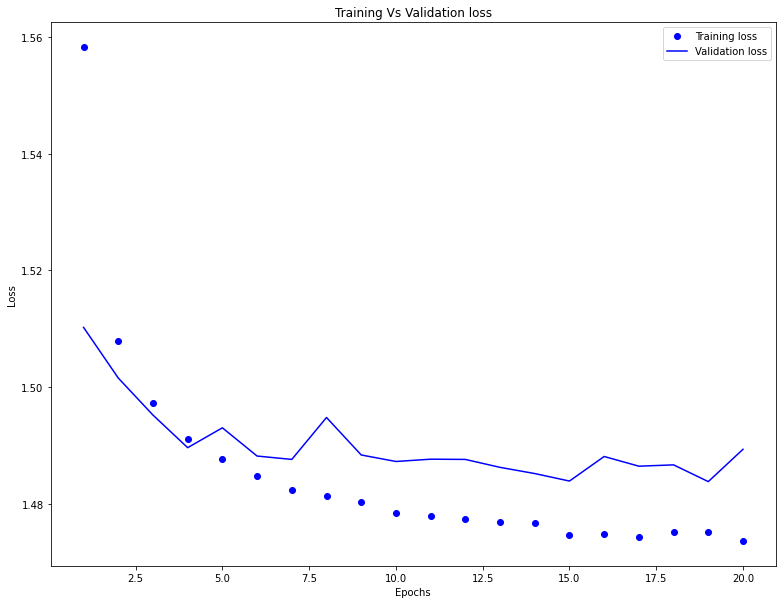

In [119]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(13,10))
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training Vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Plot the accuracy for all epochs using Matplotlib

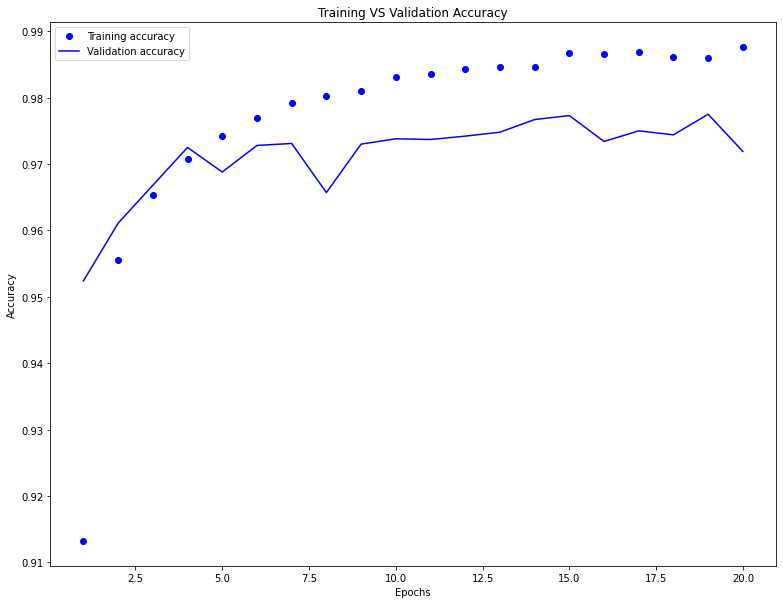

In [120]:
acc = history.history['Accuracy']
val_acc = history.history["val_Accuracy"]
plt.figure(figsize=(13,10))
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training VS Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

 ### Optional extra reading: Optimisation schemes

You might have noticed that we are using the Adam optimizer to train our neural networks. Adam is a variant of stochastic gradient descent which often performs well in practice. In fact, there is a whole range of variations on stochastic gradient descent that are often used. Here is an illustration showing how a few of these methods perform on a toy problem: 

![optimization methods](http://ruder.io/content/images/2016/09/saddle_point_evaluation_optimizers.gif)

For a detailed description of various optimization methods read [this](http://ruder.io/optimizing-gradient-descent/) article. For a great visual discussion on how these methods work see [this](https://distill.pub/2017/momentum/) article.

## Testing

After 20 epochs of training on our training set, we obtain a loss of around 0.148 and accuracy of 97%. That's pretty good, right? 

It is important to distinguish between data that is **in-sample** and **out-of-sample**. Our training data is all in-sample and we would expect any resonably powerful model (like an MLP) to be very accurate and have a low loss on this (in fact, with a sufficiently large MLP and enough training epochs, we can get the loss arbitrarily close to zero!). This is not a good thing though, because pushing the loss close to zero may mean that the model has fit the **noise** in the training data rather than the true signal. If this is the case, it will not perform well on out-of-sample data that it has not seen before (which is what we really care about!). To assess this, we evaluate our trained model on the held-out test set (but we don't update the parameters of the model when testing it, that would be cheating!)

In [124]:
test_preds = model(test_images, training=False)
metric = tf.keras.metrics.SparseCategoricalAccuracy()
print('Testset Accuracy: {:.3f}'.format(metric(test_labels,test_preds)))

Testset Accuracy: 0.973


Well, we got a decent result in the test set as well. So we can safely say that our model generalizes well, but this is not always the case.

Sometimes we get a very good score in the training set but quite bad score in the test set. It is what we call **"Overfitting"**. Why does that happen? It happens because the model is just too powerful (complex) to the extent where it just memorizes the whole data instead of learning a general pattern.

Also, there is the problem of **underfitting** which is the opposite. It occurs when the model does not have enough complexity (also known as capacity) to learn a general pattern.

Unlike overfitting which has a number of solutions, such as decreasing the complexity of the model, collecting more data, data augmentation, dropout, and L1/L2 regularization, underfitting has one simple solution: just make your model incrementally more complex until it no longer underfits.


OK, but as we shouldn't touch our test set until the end, how could we detect the overfitting?
That's where the **validation set** comes in. We train the model on the training set and evaluate it on the validation set. After finalizing everything we try it on the test set.

In addition to detecting overfitting and underfitting, We can also use this validation set to tune our model by selecting hyperparameters such as the batch size, sizes of layers or the network architecture. 


![underandoverfitting](https://i.imgur.com/m2bSP1S.png)